# **Partie 1 (Data Visualisation et Feature Selection et Normalisation):**

# 1. En utilisant pandas essayer d’explorer les données du Data set

In [ ]:
# imports libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

from catboost import CatBoostClassifier
# !pip install catboost

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import pickle 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# exploration de data avec pandas
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv("/content/datasets/pima-indians-diabetes.csv" , names=names)
# afficher les trois premier lignes de dataset salaire
df.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# la forme de dataset
df.shape

(768, 9)

In [ ]:
df['class'].unique()

array([1, 0])

# 2.   Afficher le **résumer statistique** du Data Sets avec une interprétation des résultats

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


pas de missing value  
pas de type objet :  les types de donnes ce sont soit des entiers ou des float 

In [ ]:
# afficher le resume statistique dataset/salaire 
df.describe() 

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3. Afficher les nuages des points du data set en utilisant matplotlib et p scatter_matrix .

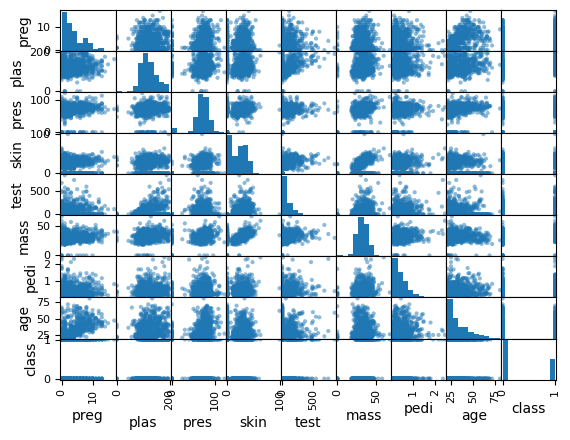

In [ ]:
# la nuage des points du  data set «pima-indians-diabetes.csv» 
scatter_matrix(df)
plt.show()
# scatter_matrix : Elle affiche la relation entre chaque paire de variables numériques dans notre ensemble de donnees 

# 4. Features selection: Univariate Selection, PCA,Recursive Feature Elimination et Feature Importance

### 1- Univariate Selection : selection de 4 features les plus important 

In [ ]:
array = df.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
scores = fit.scores_.sort
print(fit.scores_)
nouveauData = fit.transform(X)
# summarize selected features
selected_columns = fit.get_support(indices=True)
selected_features = df.columns[selected_columns]
print("Les 4 meilleurs features sélectionnés : "+str(selected_features))
print(nouveauData[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
Les 4 meilleurs features sélectionnés : Index(['plas', 'test', 'age'], dtype='object')
[[148.   0.  50.]
 [ 85.   0.  31.]
 [183.   0.  32.]
 [ 89.  94.  21.]
 [137. 168.  33.]]


### 2 -  PCA : "Principal Component Analysis

In [ ]:
# feature extraction
pca = PCA(n_components=4)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
# les vecteur propres qui dirigents les directions choisit par PCA
print(fit.components_)
print(X)

Explained Variance: [0.889 0.062 0.026 0.013]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]
 [-4.905e-02  1.198e-01 -2.627e-01  8.844e-01 -6.555e-02  1.928e-01
   2.699e-03 -3.010e-01]]
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


### 3 -  RFE : Recursive Feature Elimination 

In [ ]:

# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Columns: %s" % fit.support_)
selected_columns = fit.get_support(indices=True)
print(f"selected_features = {df.columns[selected_columns]}")
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 4
Selected Columns: [ True  True False False False  True  True False]
selected_features = Index(['preg', 'plas', 'mass', 'pedi'], dtype='object')
Feature Ranking: [1 1 3 4 5 1 1 2]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4 -  FI : Feature Importance

In [ ]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
arr = np.array(model.feature_importances_)
print(arr)
print(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'])
print(f"les quatres features les plus importants sont  : 'plas' , 'mass' , 'pedi' , 'age' ")

[0.113 0.226 0.099 0.08  0.074 0.141 0.122 0.145]
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
les quatres features les plus importants sont  : 'plas' , 'mass' , 'pedi' , 'age' 


# 5. Normaliser les données des attributs qui nécessitent une normalisation. 

In [ ]:
#  les colonnes qu'on doit normalizer sont 'test' , 'plas' , puisque il ont une grand ecart type , ses valeurs sont les plus disperse

# Instancier le scaler
scaler = MinMaxScaler()

# Normaliser les colonnes 'test' et 'plas'
cols_to_normalize = ['test', 'plas']
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Afficher les 4 premières lignes du dataframe après la normalisation
print(df.head(4))

   preg      plas  pres  skin      test  mass   pedi  age  class
0     6  0.743719    72    35  0.000000  33.6  0.627   50      1
1     1  0.427136    66    29  0.000000  26.6  0.351   31      0
2     8  0.919598    64     0  0.000000  23.3  0.672   32      1
3     1  0.447236    66    23  0.111111  28.1  0.167   21      0


In [ ]:
X_normalized = df.values[:,:8]
Y_normalized = df.values[:,8]
X_normalized

array([[ 6.   ,  0.744, 72.   , ..., 33.6  ,  0.627, 50.   ],
       [ 1.   ,  0.427, 66.   , ..., 26.6  ,  0.351, 31.   ],
       [ 8.   ,  0.92 , 64.   , ..., 23.3  ,  0.672, 32.   ],
       ...,
       [ 5.   ,  0.608, 72.   , ..., 26.2  ,  0.245, 30.   ],
       [ 1.   ,  0.633, 60.   , ..., 30.1  ,  0.349, 47.   ],
       [ 1.   ,  0.467, 70.   , ..., 30.4  ,  0.315, 23.   ]])

# **Partie 2 (Classification choix de algorithme adéquat )**




# 1. KNN, Decision Tree, ANN,Naive Bayes, SVM  selon les kernels suivants : Linear, polynomial  et guassain»

### 1.1 KNN

In [ ]:
# separer les donners : entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y_normalized, test_size=0.3) # 70%

Text(0, 0.5, 'Error Rate')

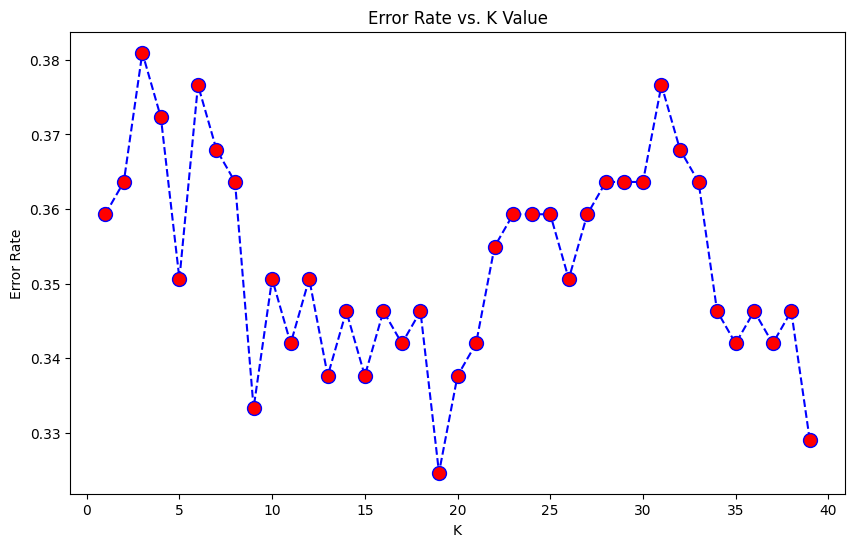

In [ ]:
# choix de meilleur K parameter

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# on choisit k = 25
model_KNN = KNeighborsClassifier(n_neighbors=25)
# Train the model using the training sets
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

### 1.2 ANN : artificial neural network

In [ ]:
 
# MLP: création + entrainement
model_ANN = MLPClassifier(hidden_layer_sizes=(15, 10), random_state=1, max_iter=800)
model_ANN.fit(X_train , y_train)

MLPClassifier(hidden_layer_sizes=(15, 10), max_iter=800, random_state=1)

### 1.3 decision tree

In [ ]:

# Create Decision Tree classifer object
model_DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

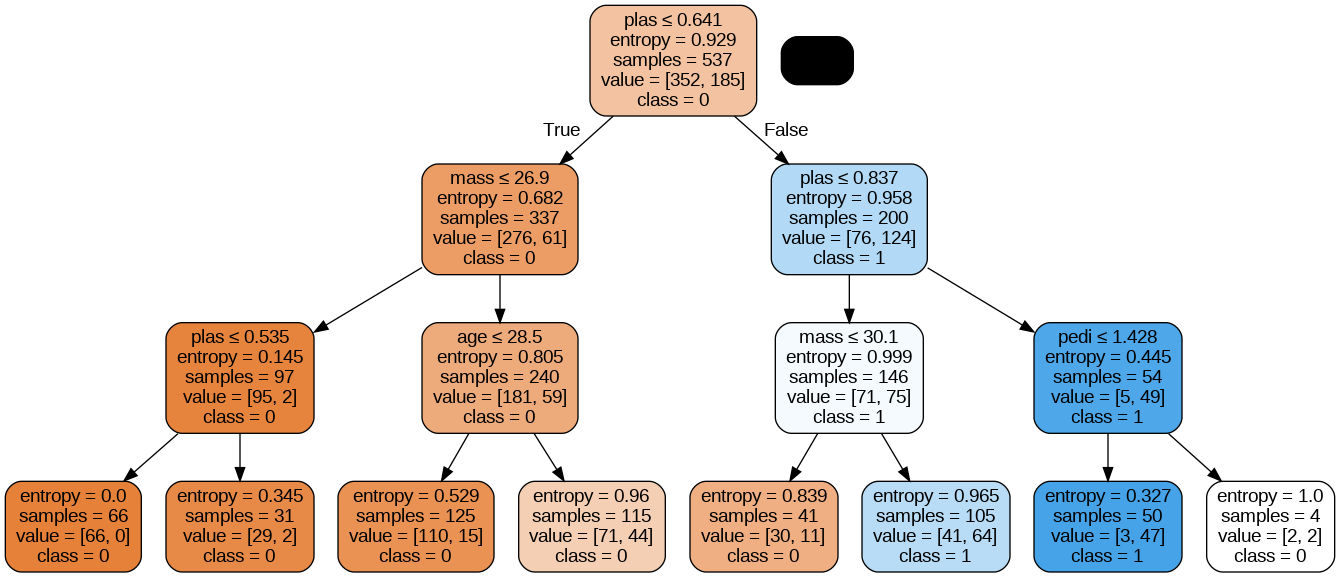

In [ ]:
feature_cols =  ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
dot_data = StringIO()
export_graphviz(model_DT, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### 1.4 Naive Bayes

In [ ]:

# define the model
model_NB = GaussianNB()
# fit the model
model_NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
# exemple
yhat_prob = model_NB.predict_proba([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
print(yhat_prob)

[[0. 1.]]


### 1.5 SVM  

In [ ]:

# 1.5.1 SVM kernel : linaire

classifier_linear = SVC(kernel='linear', random_state=0 , probability=True)
classifier_linear.fit(X_train,y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
# 1.5.1 SVM kernel : polynomial

classifier_poly = SVC(kernel='poly', random_state=0 ,  probability=True)
classifier_poly.fit(X_train,y_train)

SVC(kernel='poly', probability=True, random_state=0)

In [ ]:
 # 1.5.1 SVM kernel : guassain

classifier_rbf = SVC(kernel='rbf', random_state=0 ,  probability=True)
classifier_rbf.fit(X_train,y_train)

SVC(probability=True, random_state=0)

# 2. Sauvegarder les 5 modèles

In [ ]:
# --- Méthode de sauvegarde --- 
def sauvegarder(algorithme): 
    if algorithme == model_KNN: 
        pickle.dump(algorithme, open('EntrainementKNN.sav', 'wb')) 
    elif algorithme == model_DT: 
        pickle.dump(algorithme, open('EntrainementDT.sav', 'wb')) 
    elif algorithme == model_ANN: 
        pickle.dump(algorithme, open('EntrainementANN.sav', 'wb')) 
    elif algorithme == model_NB: 
        pickle.dump(algorithme, open('EntrainementNB.sav', 'wb')) 
    else: 
        pickle.dump(algorithme, open('EntrainementSVM.sav', 'wb')) 


In [ ]:

# --- Sauvegade --- 
sauvegarder(model_KNN) 
sauvegarder(model_DT) 
sauvegarder(model_ANN) 
sauvegarder(model_NB) 
sauvegarder(classifier_linear)

# 3. Évaluer les modèles

### 3.1 - Classification Accuracy

In [ ]:
###### KNN  ######
#Predict the response for test dataset
y_pred_KNN = model_KNN.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred_KNN))

Accuracy KNN: 0.6406926406926406


In [ ]:
###### Decision Tree  ######
#Predict the response for test dataset
y_pred_DT = model_DT.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy decision tree:",metrics.accuracy_score(y_test, y_pred_DT))

Accuracy decision tree: 0.7619047619047619


In [ ]:
###### ANN  ######
#Predict the response for test dataset
y_pred_ANN = model_ANN.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy ANN : ",metrics.accuracy_score(y_test, y_pred_ANN))

Accuracy ANN :  0.7012987012987013


In [ ]:
###### Naive Bayes  ######
# make a classification prediction
y_pred_NB = model_NB.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy naive bais:",metrics.accuracy_score(y_test, y_pred_NB))

Accuracy naive bais: 0.7402597402597403


In [ ]:
###### SVM  ######

## kernel lineaire ##
#Predicting the test set result
y_pred_linear= classifier_linear.predict(X_test)
print("Accuracy linear SVM :",metrics.accuracy_score(y_test, y_pred_linear))

## kernel polynomial ##
#Predicting the test set result
y_pred_poly= classifier_poly.predict(X_test)
print("Accuracy polynomial SVM :",metrics.accuracy_score(y_test, y_pred_poly))

## kernel guassain ##
#Predicting the test set result
y_pred_rbf= classifier_rbf.predict(X_test)
# evaluer le model 
print("Accuracy gaussian SVM :",metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy linear SVM : 0.7662337662337663
Accuracy polynomial SVM : 0.6883116883116883
Accuracy gaussian SVM : 0.645021645021645


### 2 - Logarithmic Loss.

In [ ]:
###### KNN  ######
# Predict the probabilities of the test set using your classifier
y_pred_proba_KNN = model_KNN.predict_proba(X_test)
# Calculate the log loss between the predicted probabilities and the true labels
logloss_KNN = log_loss(y_test, y_pred_proba_KNN)
# Print the log loss
print("Logarithmic Loss KNN:", logloss_KNN)


Logarithmic Loss KNN: 0.5907111557589714


In [ ]:
###### Decision Tree  ######

# Predict the probabilities of the test set using your classifier
y_pred_proba_DT= model_DT.predict_proba(X_test)
# Calculate the log loss between the predicted probabilities and the true labels
logloss_DT = log_loss(y_test, y_pred_proba_DT)
# Print the log loss
print("Logarithmic Loss DT:", logloss_DT)

Logarithmic Loss DT: 0.6537724620063079


In [ ]:
###### ANN  ######

# Predict the probabilities of the test set using your classifier
y_pred_proba_ANN= model_ANN.predict_proba(X_test)
# Calculate the log loss between the predicted probabilities and the true labels
logloss_ANN = log_loss(y_test, y_pred_proba_ANN)
# Print the log loss
print("Logarithmic Loss ANN:", logloss_ANN)

Logarithmic Loss ANN: 0.7042980544949108


In [ ]:
###### Naive Bayes  ######

# Predict the probabilities of the test set using your classifier
y_pred_proba_NB= model_NB.predict_proba(X_test)
# Calculate the log loss between the predicted probabilities and the true labels
logloss_NB = log_loss(y_test, y_pred_proba_NB)
# Print the log loss
print("Logarithmic Loss NB:", logloss_NB)

Logarithmic Loss NB: 0.5811023099913204


In [ ]:
###### SVM: kernel lineaire ######

# Predict the probabilities of the test set using your classifier
y_pred_proba_SVM_lin= classifier_linear.predict_proba(X_test)
# Calculate the log loss between the predicted probabilities and the true labels
logloss_SVM_Lin = log_loss(y_test, y_pred_proba_SVM_lin)
# Print the log loss
print("Logarithmic Loss SVM lineaire:", logloss_SVM_Lin)

Logarithmic Loss SVM lineaire: 0.49057324505052985


In [ ]:
###### SVM: kernel polinomial ######

# Predict the probabilities of the test set using your classifier
y_pred_proba_SVM_poly= classifier_poly.predict_proba(X_test)
# Calculate the log loss between the predicted probabilities and the true labels
logloss_SVM_poly = log_loss(y_test, y_pred_proba_SVM_poly)
# Print the log loss
print("Logarithmic Loss SVM polinomial:", logloss_SVM_poly)

Logarithmic Loss SVM polinomial: 0.6020112477727613


In [ ]:
###### SVM: kernel guassain ######

# Predict the probabilities of the test set using your classifier
y_pred_proba_SVM_rbf= classifier_rbf.predict_proba(X_test)
# Calculate the log loss between the predicted probabilities and the true labels
logloss_SVM_rbf = log_loss(y_test, y_pred_proba_SVM_rbf)
# Print the log loss
print("Logarithmic Loss SVM polinomial:", logloss_SVM_rbf)

Logarithmic Loss SVM polinomial: 0.6110354591762083


### 3 - Area Under ROC Curve. 


In [ ]:
###### KNN  ######
y_pred_proba = model_KNN.predict_proba(X_test)[:, 1]  # probabilité des prédictions de classe positive
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("KNN  Aire sous la courbe ROC:", auc_roc)

###### Decision Tree  ######
y_pred_proba = model_DT.predict_proba(X_test)[:, 1]  # probabilité des prédictions de classe positive
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("Decision Tree  Aire sous la courbe ROC:", auc_roc)

###### ANN  ######
y_pred_proba = model_ANN.predict_proba(X_test)[:, 1]  # probabilité des prédictions de classe positive
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("ANN  Aire sous la courbe ROC:", auc_roc)

######  Naive Bayes  ######
y_pred_proba = model_NB.predict_proba(X_test)[:, 1]  # probabilité des prédictions de classe positive
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(" Naive Bayes  Aire sous la courbe ROC:", auc_roc)

######  SVM: kernel lineaire  ######
y_pred_proba = classifier_linear.predict_proba(X_test)[:, 1]  # probabilité des prédictions de classe positive
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(" SVM  kernel lineaire  Aire sous la courbe ROC:", auc_roc)

######  SVM: kernel polinomial  ######
y_pred_proba = classifier_poly.predict_proba(X_test)[:, 1]  # probabilité des prédictions de classe positive
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(" SVM  kernel polinomial  Aire sous la courbe ROC:", auc_roc)

######  SVM: kernel rbf  ######
y_pred_proba = classifier_rbf.predict_proba(X_test)[:, 1]  # probabilité des prédictions de classe positive
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(" SVM  kernel rbf  Aire sous la courbe ROC:", auc_roc)

KNN  Aire sous la courbe ROC: 0.7227287528492347
Decision Tree  Aire sous la courbe ROC: 0.8190328883099967
ANN  Aire sous la courbe ROC: 0.6946434386193422
 Naive Bayes  Aire sous la courbe ROC: 0.8045424943015305
 SVM  kernel lineaire  Aire sous la courbe ROC: 0.8246499511559753
 SVM  kernel polinomial  Aire sous la courbe ROC: 0.7294041028980788
 SVM  kernel rbf  Aire sous la courbe ROC: 0.7355910126994465


### 4 - Confusion Matrix


In [ ]:
###### KNN  ######
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(f"KNN confusion matrix  \n {cm_KNN}")

###### Decision Tree  ######
cm_DT = confusion_matrix(y_test, y_pred_DT)
print(f"DT confusion matrix  \n {cm_DT}")

###### ANN  ######
cm_ANN = confusion_matrix(y_test, y_pred_ANN)
print(f"ANN confusion matrix  \n {cm_ANN}")

###### Naive Bayes  ######
cm_NB = confusion_matrix(y_test, y_pred_NB)
print(f"NB confusion matrix  \n {cm_NB}")

###### SVM: kernel lineaire  ######
cm_lin = confusion_matrix(y_test, y_pred_linear)
print(f"SVM lineaire confusion matrix  \n {cm_lin}")

###### SVM: kernel polinomial  ######
cm_poly = confusion_matrix(y_test, y_pred_poly)
print(f"SVM poly confusion matrix  \n {cm_poly}")

###### SVM: kernel rbf  ######
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print(f"SVM rbf confusion matrix  \n {cm_rbf}")

KNN confusion matrix  
 [[129  19]
 [ 64  19]]
DT confusion matrix  
 [[133  15]
 [ 40  43]]
ANN confusion matrix  
 [[130  18]
 [ 51  32]]
NB confusion matrix  
 [[125  23]
 [ 37  46]]
SVM lineaire confusion matrix  
 [[134  14]
 [ 40  43]]
SVM poly confusion matrix  
 [[140   8]
 [ 64  19]]
SVM rbf confusion matrix  
 [[140   8]
 [ 74   9]]


### 5- Classification Report

In [ ]:
###### KNN  ######
report_KNN = classification_report(y_test, y_pred_KNN)
print(f"KNN Classification Report :  \n {report_KNN}")

###### Decision Tree  ######
report_DT = classification_report(y_test, y_pred_DT)
print(f"DT Classification Report  :  \n {report_DT}")

###### ANN  ######
report_ANN = classification_report(y_test, y_pred_ANN)
print(f"ANN Classification Report :   \n {report_ANN}")

###### Naive Bayes  ######
report_NB = classification_report(y_test, y_pred_NB)
print(f"NB Classification Report : \n {report_NB}")

###### SVM: kernel lineaire  ######
report_lin = classification_report(y_test, y_pred_linear)
print(f"SVM lineaire Classification Report : \n {report_lin}")

###### SVM: kernel polinomial  ######
report_poly = classification_report(y_test, y_pred_poly)
print(f"SVM poly Classification Report :  \n {report_poly}")

###### SVM: kernel rbf  ######
report_rbf = classification_report(y_test, y_pred_rbf)
print(f"SVM rbf Classification Report : \n {report_rbf}")

KNN Classification Report :  
               precision    recall  f1-score   support

         0.0       0.67      0.87      0.76       148
         1.0       0.50      0.23      0.31        83

    accuracy                           0.64       231
   macro avg       0.58      0.55      0.54       231
weighted avg       0.61      0.64      0.60       231

DT Classification Report  :  
               precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       148
         1.0       0.74      0.52      0.61        83

    accuracy                           0.76       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

ANN Classification Report :   
               precision    recall  f1-score   support

         0.0       0.72      0.88      0.79       148
         1.0       0.64      0.39      0.48        83

    accuracy                           0.70       231
   macro avg       0.68      0.63 

### Interpréter le résultat de l’évaluation 


le modèle SVM avec un noyau linéaire semble être le meilleur choix pour ce problème de classification binaire
 suivi de près par KNN et Naive Bayes.  


# 4. Comparer la performance des 8 algorithmes en utilisant la technique Spot-checking.

In [ ]:
# instanciation des algorithmes  : 
model_KNN = KNeighborsClassifier(n_neighbors=26)
model_ANN = MLPClassifier(hidden_layer_sizes=(15, 10), random_state=1, max_iter=800)
model_DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_NB = GaussianNB()
classifier_linear = SVC(kernel='linear', random_state=0 , probability=True)
classifier_poly = SVC(kernel='poly', random_state=0 ,  probability=True)
classifier_rbf = SVC(kernel='rbf', random_state=0 ,  probability=True)


In [ ]:
algorithmes = {'KNN':model_KNN,'Decision Tree': model_DT,'ANN': model_ANN, 'Naive Bayes': model_NB , 'SVM (linear)':classifier_linear , 'SVM (polynomial)' :classifier_poly , 'SVM (gaussian)' : classifier_rbf}
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
for name, algorithm  in algorithmes.items():
    scores = model_selection.cross_val_score(algorithm , X_normalized, Y_normalized, cv=kfold)
    print("{} score: {:.3f}%".format(name, scores.mean() * 100))
    
#     le model qui est le plus performant de ce proleme de classification  :  SVM(linear ) puis naive bays 

KNN score: 66.670%
Decision Tree score: 74.479%
ANN score: 69.802%
Naive Bayes score: 75.914%
SVM (linear) score: 77.992%
SVM (polynomial) score: 67.847%
SVM (gaussian) score: 67.329%


# 5 .Prédire les données du data set de test, en utilisant les 7 modèles

In [ ]:
###### KNN  ######
np.concatenate((y_test.reshape(y_test.shape[0],1),y_pred_KNN.reshape(y_pred_KNN.shape[0],1)),axis=1)

array([[0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.

In [ ]:
###### Decision Tree  ######
np.concatenate((y_test.reshape(y_test.shape[0],1),y_pred_DT.reshape(y_pred_DT.shape[0],1)),axis=1)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.

In [ ]:
###### ANN  ######
np.concatenate((y_test.reshape(y_test.shape[0],1),y_pred_ANN.reshape(y_pred_ANN.shape[0],1)),axis=1)

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.

In [ ]:
###### Naive Bayes  ######
np.concatenate((y_test.reshape(y_test.shape[0],1),y_pred_NB.reshape(y_pred_KNN.shape[0],1)),axis=1)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.

In [ ]:
###### SVM: kernel lineaire  ######
np.concatenate((y_test.reshape(y_test.shape[0],1),y_pred_linear.reshape(y_pred_linear.shape[0],1)),axis=1)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.

In [ ]:
###### SVM: kernel polinomial  ######
np.concatenate((y_test.reshape(y_test.shape[0],1),y_pred_poly.reshape(y_pred_poly.shape[0],1)),axis=1)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.

In [ ]:
###### SVM: kernel rbf  ######
np.concatenate((y_test.reshape(y_test.shape[0],1),y_pred_rbf.reshape(y_pred_rbf.shape[0],1)),axis=1)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.

# 6. Appliquer cette fois les trois techniques d’ensemble learning 
*   bagging
*   stacking
*   boosting


### 1 - bagging

In [ ]:
###### Ensemble learning  ######
model_bag = BaggingClassifier()
# fit the model on datasets
model_bag.fit(X_normalized, Y_normalized)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

###  2- stacking 

In [ ]:
# define the base models
level0 = list()
level0.append(('knn', KNeighborsClassifier()))
level0.append(('DT', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('NB', GaussianNB()))
level0.append(('ANN', MLPClassifier()))

# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model_stacking = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

###  3 - boosting

In [ ]:
# fit the model on the whole dataset
model_boosting = CatBoostClassifier(verbose=0, n_estimators=100)
model_boosting.fit(X_normalized, Y_normalized)

# 7. Comparer les résultats obtenues des trois techniques avec les résultats de 8 algorithmes

In [ ]:
###### accuracy bagging ######
n_scores = cross_val_score(model_bag, X_normalized, Y_normalized, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.743 (0.051)


In [ ]:
###### accuracy stacking ######
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model_stacking, X_normalized, Y_normalized, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(f"score  = {mean(scores)}")

score  = 0.754300524037366


In [ ]:
###### accuracy boosting ######
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_stacking, X_normalized, Y_normalized, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.753 (0.051)


* Les trois techniques d'ensemble learning ont amélioré la performance des modèles par rapport aux algorithmes de base.

* Les résultats des modèles de boosting ont été les meilleurs parmi les trois techniques d'ensemble learning. 
* les trois techniques d'ensemble learning sont lente en comparant avec les autres models , et c'est normal puisque 
*ils utilisent plusieurs modèles qui vont former un modèle plus robuste et précis